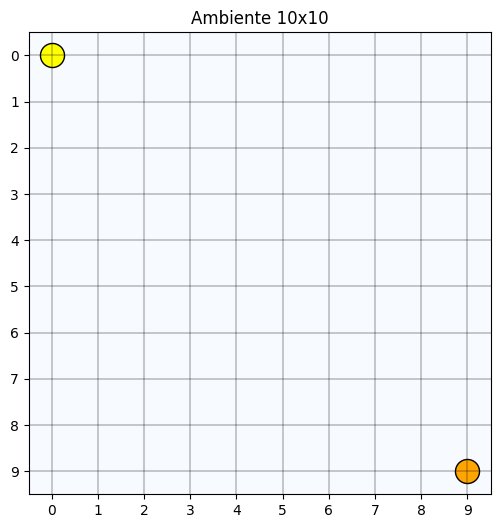


=== Estatísticas ===
Recompensa média por passo:
  média = 0.2301225490397025
  desvio padrão = 0.2831066600063822

Passos até ao objetivo:
  média = 642.6666666666666
  desvio padrão = 337.75892125729104

Tempo de execução:
  média = 0.00036814212799072263
  desvio padrão = 0.0013036747589616209


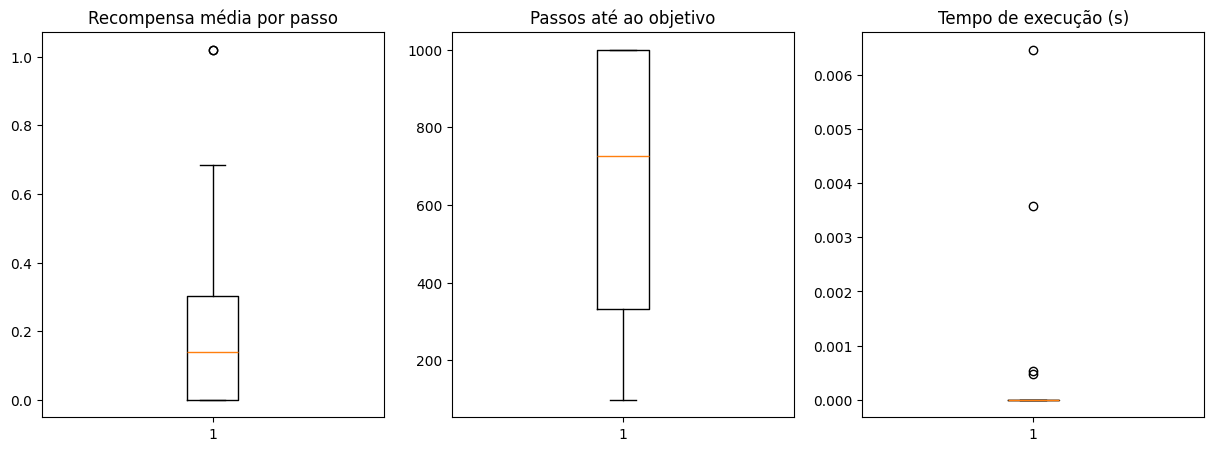

In [16]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

GRID_ROWS = 10
GRID_COLS = 10

START_STATE = 1
GOAL_STATE = 100

ACTIONS = ["up", "down", "left", "right"]
ACTION_DELTAS = {
    "up": (-1, 0),
    "down": (1, 0),
    "left": (0, -1),
    "right": (0, 1)
}

# Converte número de estado para (linha, coluna)
def state_to_coords(state):
    row = (state - 1) // GRID_COLS
    col = (state - 1) % GRID_COLS
    return row, col

# Converte (linha, coluna) para número de estado
def coords_to_state(row, col):
    return row * GRID_COLS + col + 1

# Movimentos no ambiente
def transition(state, action):
    row, col = state_to_coords(state)
    dr, dc = ACTION_DELTAS[action]

    new_row = row + dr
    new_col = col + dc

    # fora da grelha -> fica no mesmo
    if not (0 <= new_row < GRID_ROWS and 0 <= new_col < GRID_COLS):
        return state

    return coords_to_state(new_row, new_col)

# Recompensa
def reward(state):
    if state == GOAL_STATE:
        return 100
    return 0

# Ação aleatória
def random_action():
    return random.choice(ACTIONS)

# Episódio
def run_episode(max_steps=1000):
    state = START_STATE
    total_reward = 0
    steps = 0

    start_t = time.time()

    while steps < max_steps:
        action = random_action()
        new_state = transition(state, action)
        r = reward(new_state)

        total_reward += r
        steps += 1

        if new_state == GOAL_STATE:
            break

        state = new_state

    end_t = time.time()

    return {
        "steps": steps,
        "total_reward": total_reward,
        "mean_reward_per_step": total_reward / steps,
        "exec_time": end_t - start_t
    }

# Repetir 30 vezes
def run_experiments(n=30):
    results = {"mean_rewards": [], "steps": [], "times": []}

    for _ in range(n):
        ep = run_episode()
        results["mean_rewards"].append(ep["mean_reward_per_step"])
        results["steps"].append(ep["steps"])
        results["times"].append(ep["exec_time"])

    return results

# Visualização simples da grelha
def draw_environment():
    grid = np.zeros((GRID_ROWS, GRID_COLS))

    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap="Blues", origin="upper")

    # início
    sr, sc = state_to_coords(START_STATE)
    plt.scatter(sc, sr, c="yellow", s=300, edgecolors="black")

    # objetivo
    gr, gc = state_to_coords(GOAL_STATE)
    plt.scatter(gc, gr, c="orange", s=300, edgecolors="black")

    plt.xticks(range(GRID_COLS))
    plt.yticks(range(GRID_ROWS))
    plt.grid(True, color="black", linewidth=0.3)
    plt.title("Ambiente 10x10")
    plt.show()

# Boxplots
def plot_results(results):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].boxplot(results["mean_rewards"])
    ax[0].set_title("Recompensa média por passo")

    ax[1].boxplot(results["steps"])
    ax[1].set_title("Passos até ao objetivo")

    ax[2].boxplot(results["times"])
    ax[2].set_title("Tempo de execução (s)")

    plt.show()


# Main
if __name__ == "__main__":
    random.seed(123)
    np.random.seed(123)

    draw_environment()

    results = run_experiments(30)

    print("\n=== Estatísticas ===")
    print("Recompensa média por passo:")
    print("  média =", np.mean(results["mean_rewards"]))
    print("  desvio padrão =", np.std(results["mean_rewards"]))

    print("\nPassos até ao objetivo:")
    print("  média =", np.mean(results["steps"]))
    print("  desvio padrão =", np.std(results["steps"]))

    print("\nTempo de execução:")
    print("  média =", np.mean(results["times"]))
    print("  desvio padrão =", np.std(results["times"]))

    plot_results(results)
